# COVID-19 Xray

## 1. About Dataset
**COVID-19 Xray Dataset (Train & Test Sets)**  
From: [SMART-CT-SCAN BASED COVID19 VIRUS DETECTOR](https://github.com/JordanMicahBennett/SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR/)  
The author of the above repository transformed the data from [COVID Chest X-ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)

    Background
The 2019 novel coronavirus (COVID-19) presents several unique features. While the diagnosis is confirmed using polymerase chain reaction (PCR), infected patients with pneumonia may present on chest X-ray and computed tomography (CT) images with a pattern that is only moderately characteristic for the human eye (Ng, 2020). COVID-19’s rate of transmission depends on our capacity to reliably identify infected patients with a low rate of false negatives. In addition, a low rate of false positives is required to avoid further increasing the burden on the healthcare system by unnecessarily exposing patients to quarantine if that is not required. Along with proper infection control, it is evident that timely detection of the disease would enable the implementation of all the supportive care required by patients affected by COVID-19.

In late January, a Chinese team published a paper detailing the clinical and paraclinical features of COVID-19. They reported that patients present abnormalities in chest CT images with most having bilateral involvement (Huang, 2020). Bilateral multiple lobular and subsegmental areas of consolidation constitute the typical findings in chest CT images of intensive care unit (ICU) patients on admission (Huang, 2020). In comparison, non-ICU patients show bilateral ground-glass opacity and subsegmental areas of consolidation in their chest CT images (Huang, 2020). In these patients, later chest CT images display bilateral ground-glass opacity with resolved consolidation (Huang, 2020).

COVID-19 is possibly better diagnosed using radiological imaging (Fang, 2020 and Ai, 2020).


## 2. Dataset Overview

The dataset is organized into two distinct sets: **train** and **test**, each containing X-ray images of human chests. These images are categorized into two classes:

- **No Pneumonia**: Chest X-rays of individuals without pneumonia.
- **Pneumonia**: Chest X-rays of individuals diagnosed with pneumonia.

---

In this case, the CNN could learn to identify key features that differentiate pneumonia caused by COVID-19 from normal X-ray images, aiding in faster and more accurate diagnosis.

## 3. Import

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import keras
from keras import layers
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf
from keras.callbacks import EarlyStopping
import os


In [9]:
image_folder_train = './data/xray_dataset_covid19/train/'
image_folder_test = './data/xray_dataset_covid19/test/'

In [10]:
batch_size = 32
img_height = 224
img_width = 224

## 4. Dataset Preparation

In [12]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    image_folder_test,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 40 files belonging to 2 classes.
Using 32 files for training.


In [13]:
train_set = keras.preprocessing.image_dataset_from_directory(
    image_folder_train,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 149 files belonging to 2 classes.
Using 120 files for training.


In [14]:
val_set = keras.preprocessing.image_dataset_from_directory(
    image_folder_train,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 149 files belonging to 2 classes.
Using 29 files for validation.


## 5. Data visualization

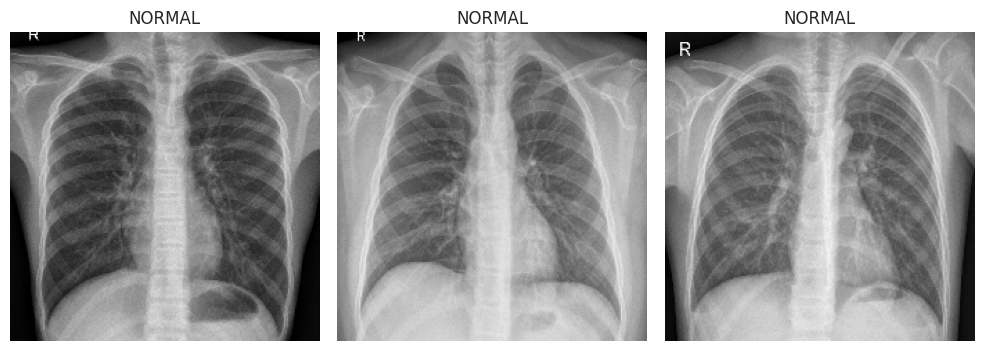

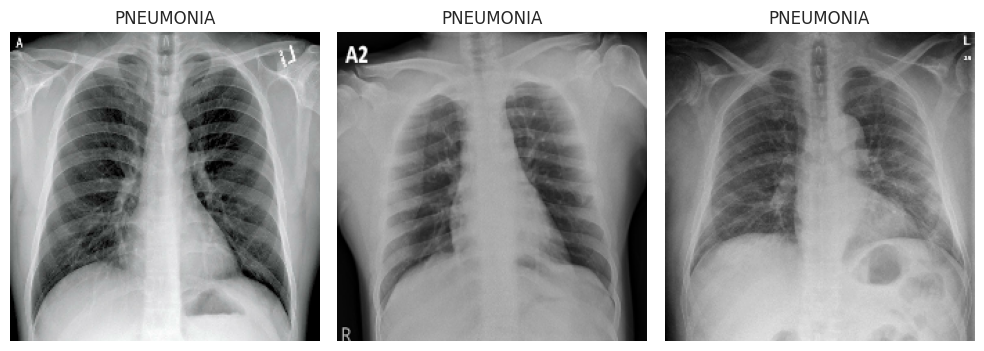

In [29]:
class_names = train_set.class_names

image_batch, label_batch = next(iter(train_set))

def plot_images(images, labels, class_names, num_images=3):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

class_0_images = image_batch[label_batch == 0][:3]
class_1_images = image_batch[label_batch == 1][:3]

plot_images(class_0_images, [0]*3, class_names)
plot_images(class_1_images, [1]*3, class_names)

## 6. Convolutional Neural Network (CNN) Model

In [20]:
model_1 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(16, 5, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(2,activation='softmax')
])

model_1.compile(optimizer=optimizers.Adamax(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │       387,202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,418 (1.48 MB)

 Trainable params: 388,418 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Epoch = 20
callback = EarlyStopping(monitor = 'val_accuracy', patience=8)
    
history_1 = model_1.fit(train_set, epochs=Epoch, verbose=1, callbacks=callback,validation_data=val_set)

Epoch 1/20


I0000 00:00:1726559147.624940    8459 service.cc:146] XLA service 0x7f1a9c008280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726559147.624987    8459 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-09-17 09:45:47.689105: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-17 09:45:47.928884: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5938 - loss: 0.6675

I0000 00:00:1726559150.552749    8459 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5904 - loss: 8.5276 - val_accuracy: 0.5862 - val_loss: 3.9870
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.6040 - loss: 3.9483 - val_accuracy: 0.4138 - val_loss: 3.7974
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5579 - loss: 2.7428 - val_accuracy: 0.8966 - val_loss: 0.2665
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - accuracy: 0.7850 - loss: 1.1342 - val_accuracy: 0.9655 - val_loss: 0.1268
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.8931 - loss: 0.4961 - val_accuracy: 0.8276 - val_loss: 0.5753
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.8942 - loss: 0.5577 - val_accuracy: 0.9655 - val_loss: 0.1079
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.8944 - loss: 0.4436 - val_accuracy: 0.9655 - val_loss: 0.0992
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.8767 - loss: 0.3892 - val_accuracy: 0.9310 - val_loss: 0.1325
Epoch 

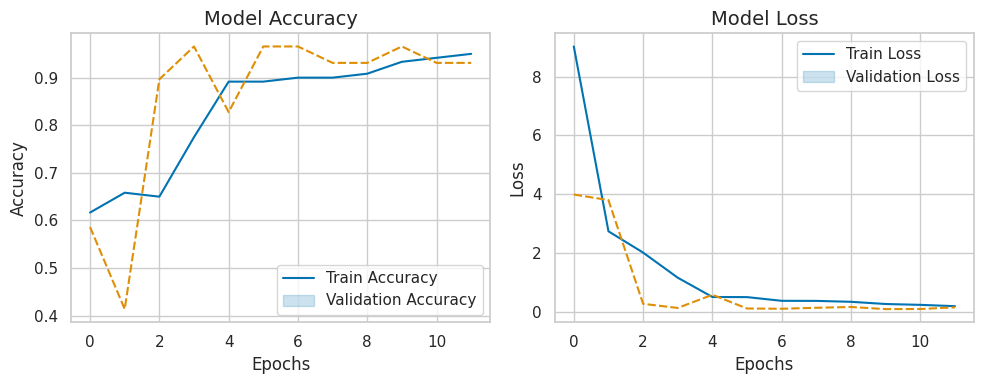

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9688 - loss: 0.0977
Test accuracy: 0.96875


In [24]:
history_df = pd.DataFrame(history_1.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_1.evaluate(test_set)
print('Test accuracy:', test_acc)

#### Interpretation

The model started with **moderate accuracy** but showed **rapid improvement** after the first few epochs. By **epoch 3**, it learned significant features, as indicated by the sharp jump in validation accuracy.

After **epoch 4**, both the training and validation performances became more consistent, showing that the model was effectively learning from the data without significant overfitting.

The final test results demonstrate that the model is **highly accurate** (96.88%) and has learned to **generalize well** to new data.


/home/dmitrii/anaconda3/envs/keras/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 106, 106, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 89888)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │       179,778 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,826 (757.13 KB)

 Trainable params: 193,826 (757.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 980ms/step - accuracy: 0.4833 - loss: 0.9133 - val_accuracy: 0.4138 - val_loss: 0.7761
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.5900 - loss: 0.6308 - val_accuracy: 1.0000 - val_loss: 0.4463
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.8950 - loss: 0.4359 - val_accuracy: 1.0000 - val_loss: 0.3218
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9510 - loss: 0.3118 - val_accuracy: 0.9310 - val_loss: 0.2557
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.9425 - loss: 0.2079 - val_accuracy: 0.9655 - val_loss: 0.1394
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9362 - loss: 0.1582 - val_accuracy: 0.8966 - val_loss: 0.2598
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9627 - loss: 0.1076 - val_accuracy: 0.9310 - val_loss: 0.1033
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.9712 - loss: 0.0718 - val_accuracy: 0.8966 - val_loss:

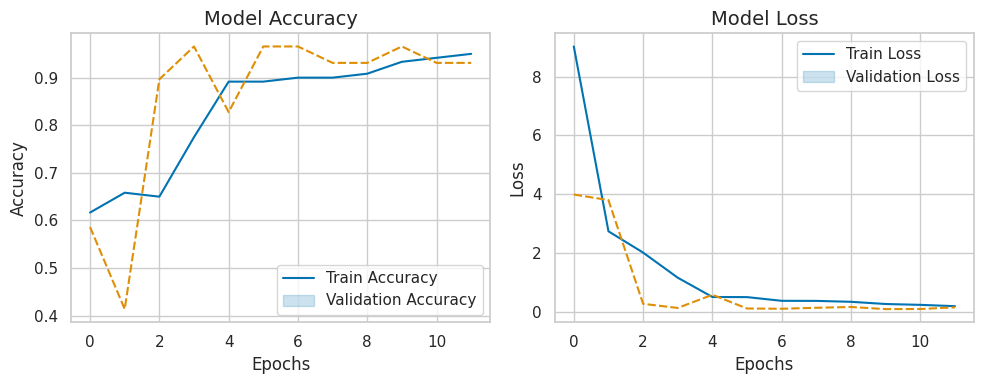

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step - accuracy: 1.0000 - loss: 0.0172
Test accuracy: 1.0


In [30]:
model_2 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),
    layers.Conv2D(16, 5, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 5, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(2,activation='softmax')
])

model_2.compile(optimizer=optimizers.Adamax(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.summary()

Epoch = 20
callback = EarlyStopping(monitor = 'val_accuracy', patience=8)
    
history_2 = model_2.fit(train_set, epochs=Epoch, verbose=1, callbacks=callback,validation_data=val_set)
history_df = pd.DataFrame(history_1.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_2.evaluate(test_set)
print('Test accuracy:', test_acc)

## 7. Conclusion

The second model converged faster and achieved **higher accuracy (100%)** with **lower final loss** compared to the first model, which reached **96.88% accuracy**.

The first model, on the other hand, showed **more gradual improvement** with strong final performance. It may have required additional epochs or parameter tuning to match the test accuracy of the second model.